In [1]:
# import stuff to view things in 3D

import numpy
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
%matplotlib inline

In [2]:
# create a standardised 3D plotter

def plot3D(x, y, u):
    
    figure = pyplot.figure()
    axes = figure.gca(projection = "3d")
    X, Y = numpy.meshgrid(x, y)
    
    surface = axes.plot_surface(X, Y, u, cmap = cm.viridis, antialiased = False)
    
    axes.set_ylabel("$y$")
    axes.set_xlabel("$x$")

In [3]:
# define a solver for the Laplace equation

def laplace_solver2d(p, dx, dy, y, tol):
    
    error = 10
    pn = numpy.empty_like(p)
    
    while error > tol:
        
        pn = p.copy()
        
        p[1:-1, 1:-1] = ((dy ** 2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) +
                         dx ** 2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1])) /
                         (2 * (dx ** 2 + dy ** 2)))
        
        # setting boundary conditions
        
        p[:, 0] = 0 # p = 0 along x = 0
        p[:, -1] = y # p = y along x = 2
        
        p[0, :] = p[1, :] # dp/dy = 0 along y = 0. by making consecutive values equal, that means dp/dy = 0
        p[-2, :] = p[-1, :] # dp/dy = 0 along y = 1
        
        error = (numpy.sum(numpy.abs(p[:]) - numpy.abs(pn[:])) /
                 numpy.sum(numpy.abs(pn[:])))
    
    # return the p matrix at the end of the while loop
    
    return p

In [4]:
# declare variables

nx = 31
ny = 31
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)


# initial conditions
p = numpy.zeros((ny, nx))  # create a XxY vector of 0's

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 1, ny)

# boundary conditions

p[:, 0] = 0  # p = 0 @ x = 0
p[:, -1] = y  # p = y @ x = 2
p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1

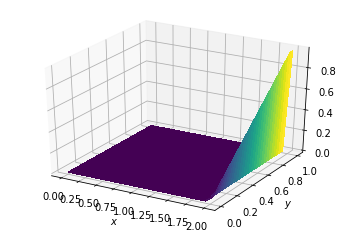

In [5]:
# visualise initial conditions

plot3D(x, y, p)

In [6]:
# run iterations

laplace_solver2d(p, dx, dy, y, 1e-4);

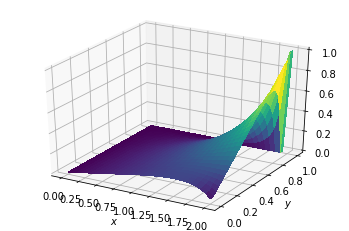

In [7]:
# visualise result after iterations

plot3D(x, y, p)